In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
sns.set_theme(style='white',palette='muted')

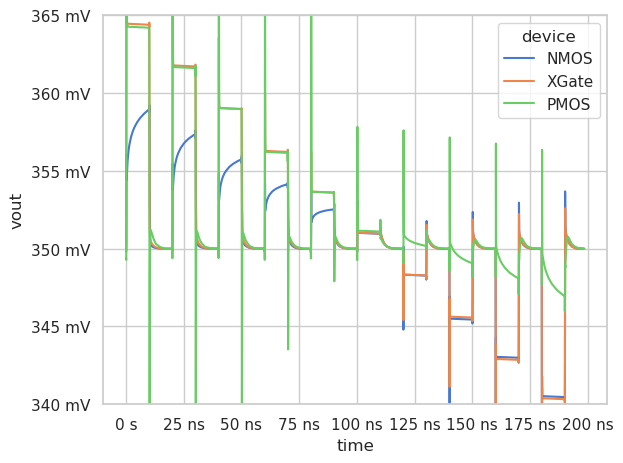

In [3]:
nmos = pd.read_csv('results/mbl_sweep_8t_nmos.csv')
nmos['time'] = nmos['tb_column.u_ts_column.U_ADC_COLUMN.MBL () X']
nmos['vout'] = nmos['tb_column.u_ts_column.U_ADC_COLUMN.MBL () Y']
nmos.drop(columns=['tb_column.u_ts_column.U_ADC_COLUMN.MBL () X','tb_column.u_ts_column.U_ADC_COLUMN.MBL () Y'],inplace=True)
nmos['device'] = 'NMOS'

nom = pd.read_csv('results/mbl_sweep_nom.csv')
nom['time'] = nom['tb_column.u_ts_column.U_ADC_COLUMN.MBL () X']
nom['vout'] = nom['tb_column.u_ts_column.U_ADC_COLUMN.MBL () Y']
nom.drop(columns=['tb_column.u_ts_column.U_ADC_COLUMN.MBL () X','tb_column.u_ts_column.U_ADC_COLUMN.MBL () Y'],inplace=True)
nom['device'] = 'XGate'

pmos = pd.read_csv('results/mbl_sweep_8t_pmos.csv')
pmos['time'] = pmos['tb_column.u_ts_column.U_ADC_COLUMN.MBL () X']
pmos['vout'] = pmos['tb_column.u_ts_column.U_ADC_COLUMN.MBL () Y']
pmos.drop(columns=['tb_column.u_ts_column.U_ADC_COLUMN.MBL () X','tb_column.u_ts_column.U_ADC_COLUMN.MBL () Y'],inplace=True)
pmos['device'] = 'PMOS'

tmin = 28.2e-6
tmax = 28.4e-6

df = pd.concat([nmos,nom,pmos])
df = df[df['time'] > tmin]
df = df[df['time'] < tmax]

from matplotlib.ticker import EngFormatter

df['time'] = df['time'] - tmin

sns.set_theme(style='whitegrid',palette='muted')
ax = sns.lineplot(data=df,x='time',y='vout',hue='device')
ax.xaxis.set_major_formatter(EngFormatter(unit='s'))
ax.yaxis.set_major_formatter(EngFormatter(unit='V'))
ax.set_ylim(.34,.365)
plt.tight_layout()

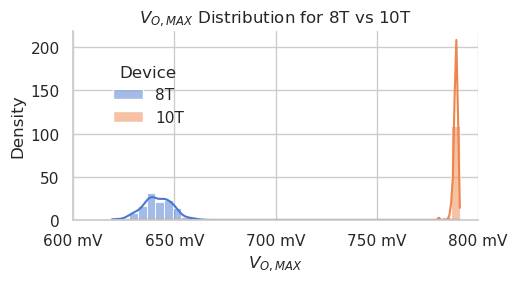

In [ ]:
range8t = pd.read_csv('results/8t_vrangemax.csv')
range10t = pd.read_csv('results/10t_vrangemax.csv')

range8t['device'] = '8T'
range10t['device'] = '10T'

df = pd.concat([range8t,range10t])

ax = sns.displot(data=df,x='VRANGEMAX Y', bins=40, hue='device',kde=True,stat='density',
height = 3, aspect = 1.5, legend=True)

sns.move_legend(ax, "upper left", bbox_to_anchor=(0.2,0.8), title='Device')


plt.title('$V_{O,MAX}$ Distribution for 8T vs 10T')

from matplotlib.ticker import EngFormatter
plt.xlabel('$V_{O,MAX}$')
plt.xlim(0.6,0.8)
ax.axes[0][0].xaxis.set_major_formatter(EngFormatter(unit='V'))

plt.tight_layout()
plt.savefig('../images/vout_dist.svg')

In [ ]:
caps = pd.read_csv('results/caps_iso_area.csv')
caps
caps['Applied Voltage'] = caps['C_PCAP X']
caps['C_PCAP Y'] = -caps['C_PCAP Y']
# Drop all X
caps.drop(columns=[col for col in caps.columns if ' X' in col],inplace=True)
caps
# Rename all Y to C_XXX
caps.rename(columns={col:col.replace(' Y','') for col in caps.columns},inplace=True)
# Melt but keep applied voltage
caps = caps.melt(id_vars='Applied Voltage')

caps['variable'] = caps['variable'].str.replace('C_','')
caps['Capacitor'] = caps['variable']
caps.drop(columns='variable',inplace=True)

caps['Capacitance'] = caps['value']
caps.drop(columns='value',inplace=True)

caps = caps[caps['Applied Voltage'] > 0.01]


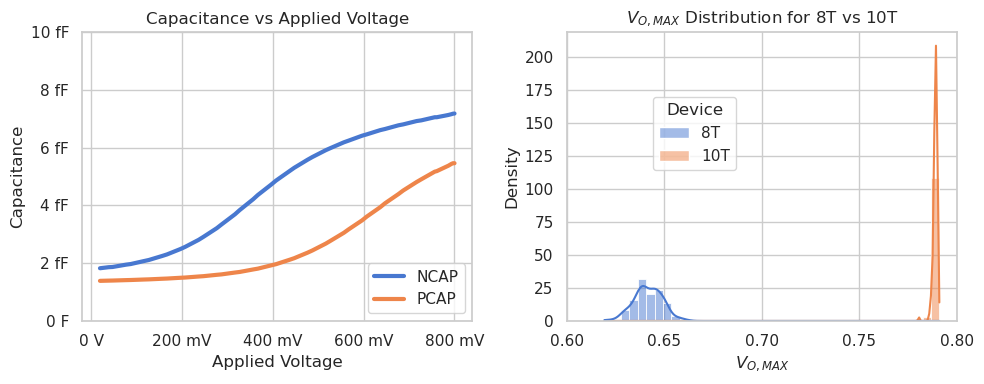

In [ ]:
fig = plt.subplots(1,2,figsize=(10,4))

# Remove MOM from caps
tpl = caps.drop(caps[caps['Capacitor'] == 'MOM'].index)

# Big line thick with dots
plt.subplot(1,2,1)
ax = sns.lineplot(data=tpl,x='Applied Voltage',y='Capacitance',hue='Capacitor',
linewidth=3)

plt.ylim(0,10e-15)

# Add MOM to legend
plt.legend(loc='lower right')
plt.legend(title='Capacitor')

# Engineering format
ax.xaxis.set_major_formatter(EngFormatter(unit='V'))
ax.yaxis.set_major_formatter(EngFormatter(unit='F'))

plt.title('Capacitance vs Applied Voltage')

plt.subplot(1,2,2)

range8t = pd.read_csv('results/8t_vrangemax.csv')
range10t = pd.read_csv('results/10t_vrangemax.csv')

range8t['device'] = '8T'
range10t['device'] = '10T'

df = pd.concat([range8t,range10t])

ax = sns.histplot(data=df,x='VRANGEMAX Y', bins=40, hue='device',kde=True,stat='density',legend=True)

sns.move_legend(ax, "upper left", bbox_to_anchor=(0.2,0.8), title='Device')


plt.title('$V_{O,MAX}$ Distribution for 8T vs 10T')

from matplotlib.ticker import EngFormatter
plt.xlabel('$V_{O,MAX}$')
plt.xlim(0.6,0.8)

plt.tight_layout()
plt.savefig('../images/vout_dist.svg')